# 1. Perkenalan Dataset

DATA SUPPLY CHAIN diambil dari Kaggle : https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis?resource=download


#2. Import Library

In [32]:

import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import seaborn as sns # Mengimpor pustaka seaborn untuk visualisasi data
import numpy as np  # Mengimpor pustaka numpy untuk komputasi ilmiah
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow

from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler  # Mengimpor LabelEncoder dan StandardScaler untuk preprocessing data
from sklearn.cluster import KMeans  # Mengimpor KMeans untuk clustering
from sklearn.decomposition import PCA  # Mengimpor PCA untuk reduksi dimensi data
from sklearn.neighbors import NearestNeighbors



#3. Memuat Dataset

In [33]:
import pandas as pd

try:
    df = pd.read_csv("https://raw.githubusercontent.com/Zuckmo/Projek-Machine-Learning---Supply-Chain/master/Dataset%20Supply%20Chain/DataCoSupplyChainDataset.csv", encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv("https://raw.githubusercontent.com/Zuckmo/Projek-Machine-Learning---Supply-Chain/master/Dataset%20Supply%20Chain/DataCoSupplyChainDataset.csv", encoding='latin-1')

df.head()
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
count,180519,180519.000000,180519.000000,180519.000000,180519.000000,180519,180519.000000,180519.000000,180519,180519,...,24840.000000,180519.000000,180519.000000,0.0,180519,180519,180519.000000,180519.0,180519,180519
unique,4,NaN,NaN,NaN,NaN,4,NaN,NaN,50,563,...,NaN,NaN,NaN,NaN,118,118,NaN,NaN,63701,4
top,DEBIT,NaN,NaN,NaN,NaN,Late delivery,NaN,NaN,Cleats,Caguas,...,NaN,NaN,NaN,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,NaN,NaN,4/17/2015 22:16,Standard Class
freq,69295,NaN,NaN,NaN,NaN,98977,NaN,NaN,24551,66770,...,NaN,NaN,NaN,NaN,24515,24515,NaN,NaN,10,107752
mean,NaN,3.497654,2.931847,21.974989,183.107609,NaN,0.548291,31.851451,NaN,NaN,...,55426.132327,692.509764,31.851451,NaN,NaN,NaN,141.232550,0.0,NaN,NaN
std,NaN,1.623722,1.374449,104.433526,120.043670,NaN,0.497664,15.640064,NaN,NaN,...,31919.279101,336.446807,15.640064,NaN,NaN,NaN,139.732492,0.0,NaN,NaN
min,NaN,0.000000,0.000000,-4274.979980,7.490000,NaN,0.000000,2.000000,NaN,NaN,...,1040.000000,19.000000,2.000000,NaN,NaN,NaN,9.990000,0.0,NaN,NaN
25%,NaN,2.000000,2.000000,7.000000,104.379997,NaN,0.000000,18.000000,NaN,NaN,...,23464.000000,403.000000,18.000000,NaN,NaN,NaN,50.000000,0.0,NaN,NaN
50%,NaN,3.000000,4.000000,31.520000,163.990005,NaN,1.000000,29.000000,NaN,NaN,...,59405.000000,627.000000,29.000000,NaN,NaN,NaN,59.990002,0.0,NaN,NaN
75%,NaN,5.000000,4.000000,64.800003,247.399994,NaN,1.000000,45.000000,NaN,NaN,...,90008.000000,1004.000000,45.000000,NaN,NaN,NaN,199.990005,0.0,NaN,NaN


#4. Exploratory Data Analysis

In [34]:
df.isnull().sum()


,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


In [35]:
print(df.duplicated().sum())

0


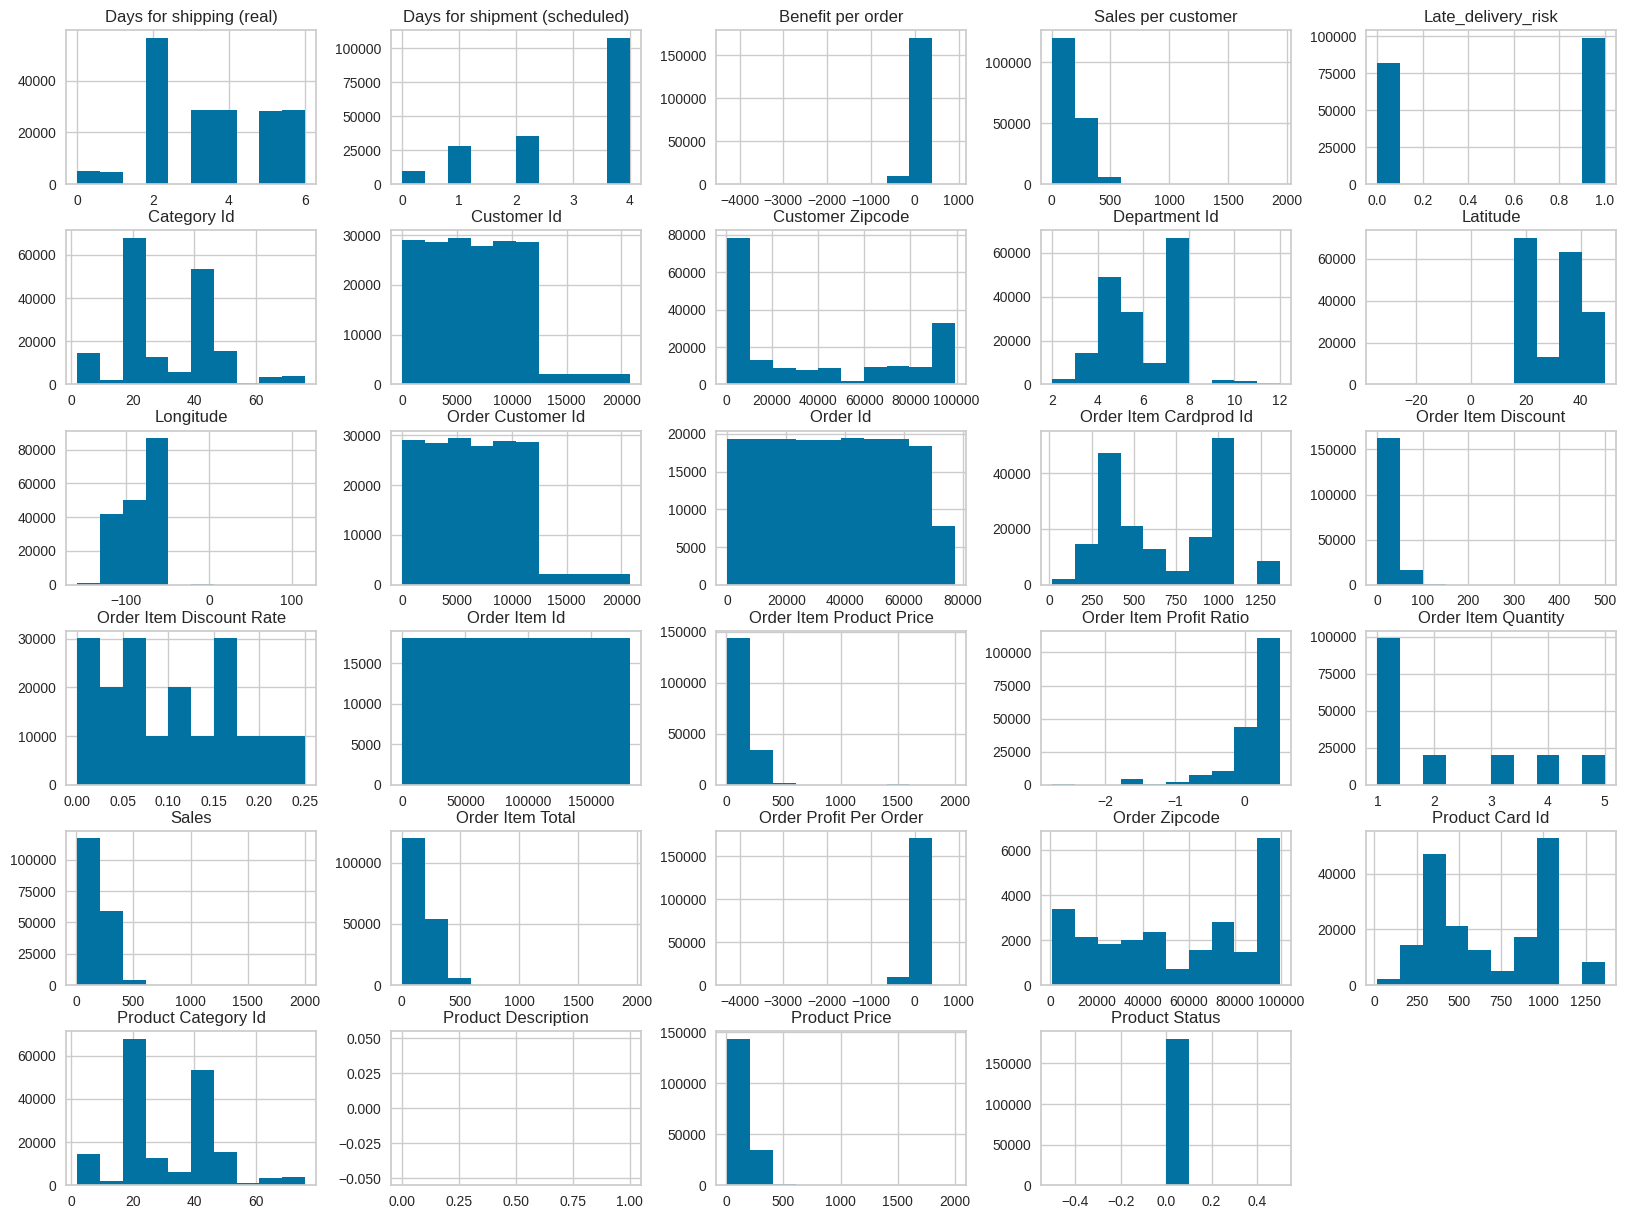

In [36]:
#melihat distribusi variable
df.hist(figsize=(20,15))
plt.show()

#5. Data Preprocessing


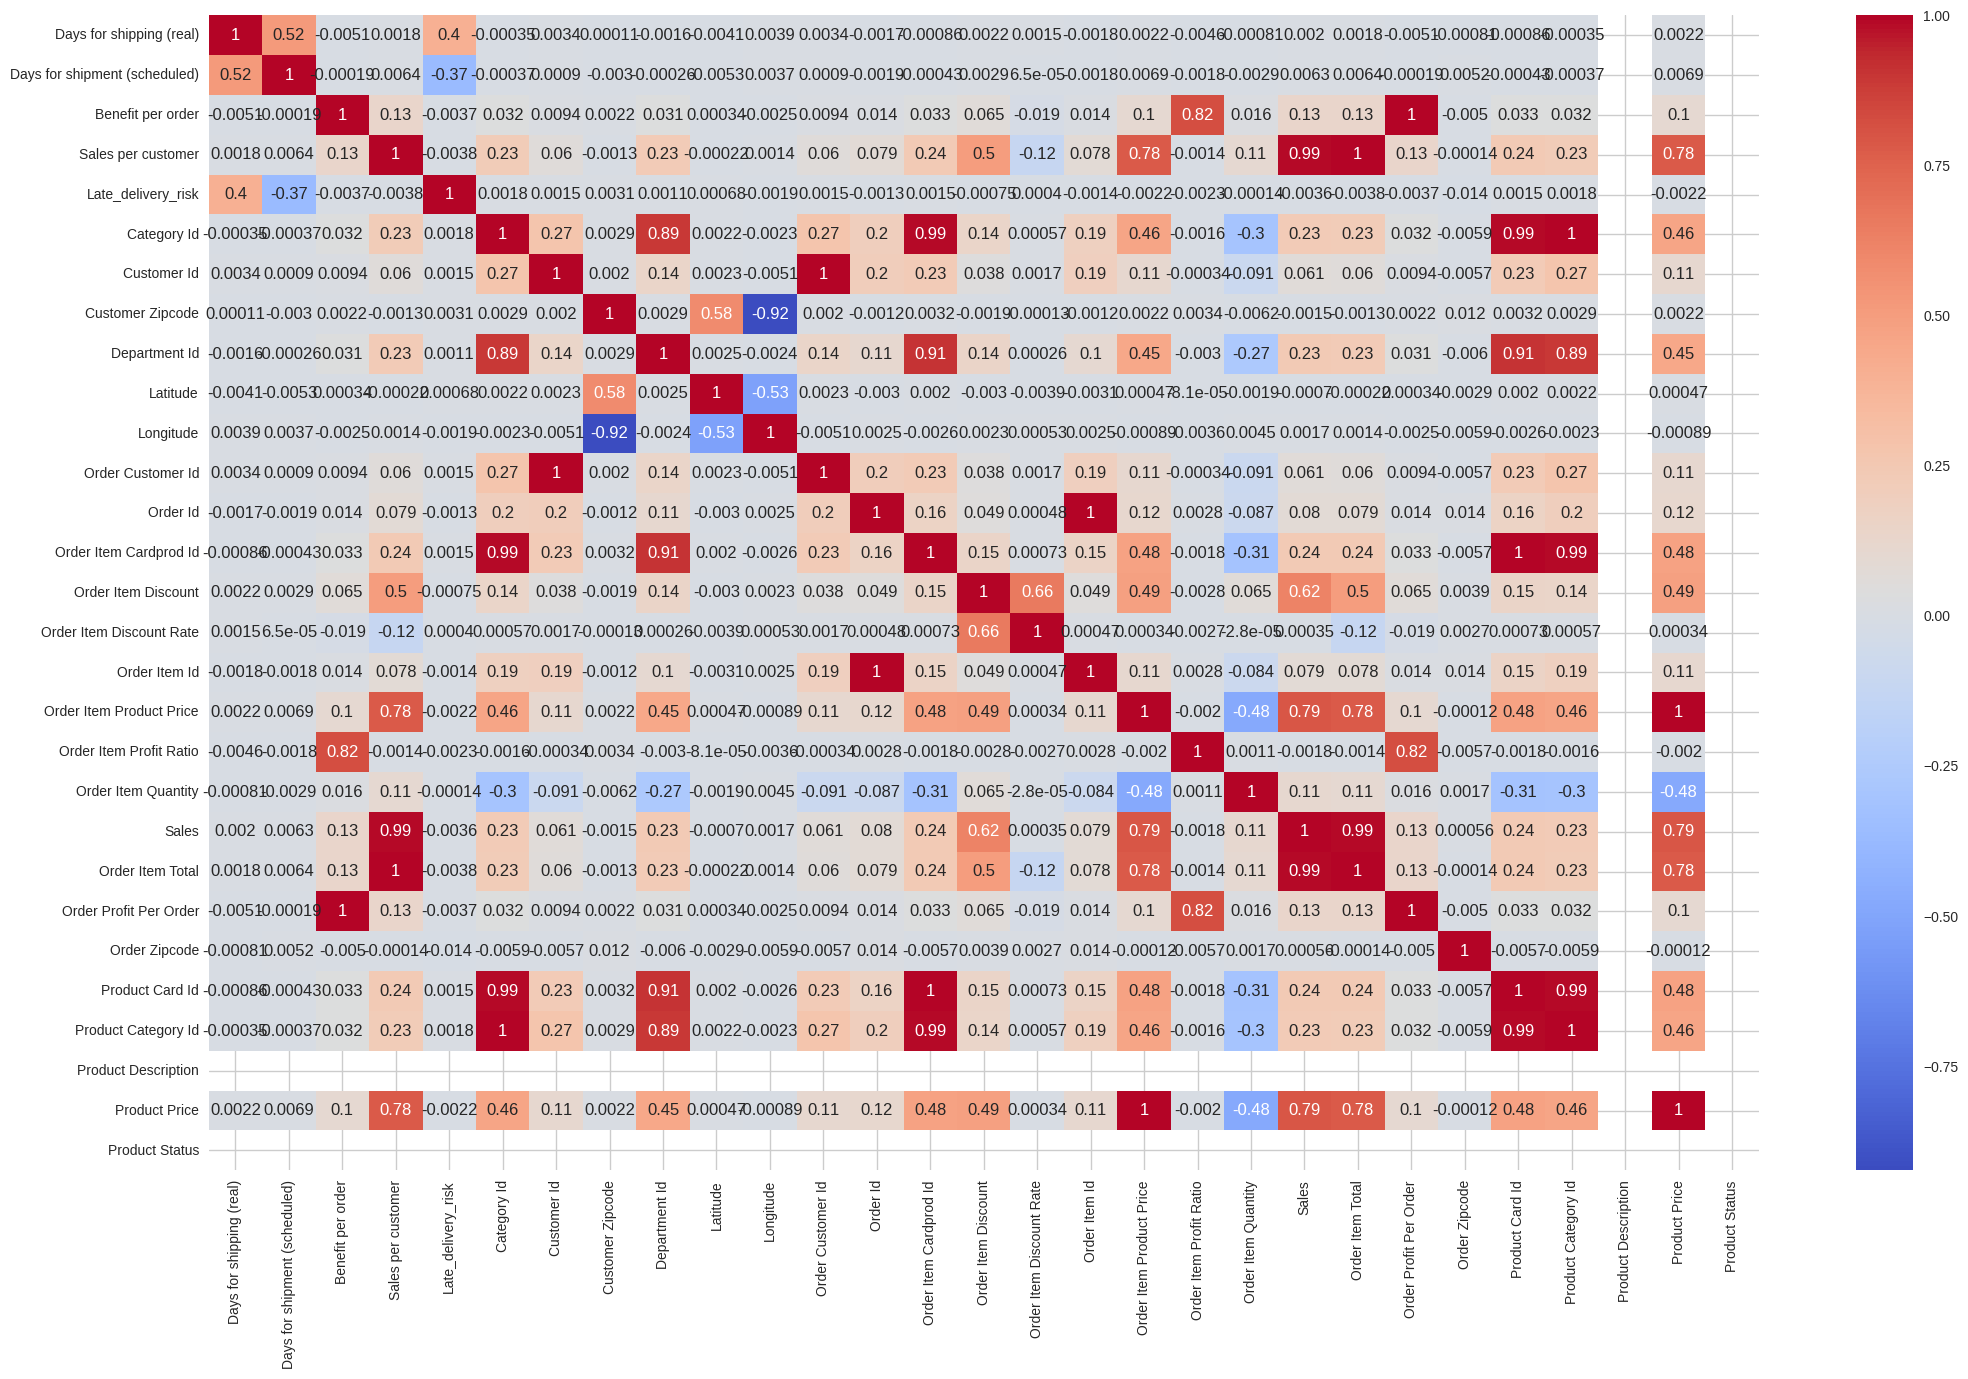

In [37]:
#mengecek korelasi variable
plt.figure(figsize=(25, 15
                    ))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm') # Select only numerical features for correlation calculation
plt.show()

In [38]:
#Fitur yang Perlu Dihapus atau Tidak Digunakan karena : data pribadi, ID unik, terlalu spesifik, tnapa image processing
df = df.drop(['Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password', 'Customer Id', 'Order Id', 'Product Card Id','Customer Street', 'Customer Zipcode', 'Order Zipcode', 'Product Description', 'Product Image' ], axis=1)

#menghpus variabel yang tidak relevan
df = df.drop(["Order Region","Latitude", "Longitude", "Days for shipping (real)", "Days for shipment (scheduled)", "Late_delivery_risk", "Order Customer Id", "Order Item Product Price", "Order Item Id", "Order Item Quantity"], axis=1)
df = df.drop(["Delivery Status","Type", "Customer City", "Product Name", "Customer State", "order date (DateOrders)", "Order State", "Order Status", "Order City", "Order Country", "Market", "shipping date (DateOrders)", "Category Name"], axis=1)
#nilai korelasinya ada yang tinggi lebih dari satu, menunjukan ada fitur yang sama
df = df.drop(["Order Item Total","Order Item Discount","Order Item Discount Rate","Sales per customer", "Category Id", "Department Id", "Order Item Cardprod Id", "Order Profit Per Order", "Product Category Id", "Product Status"], axis=1)

Menghapus outlier di Order Item Profit Ratio

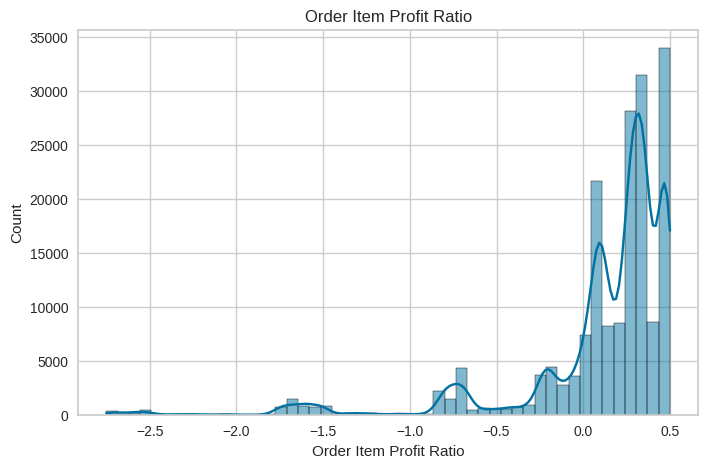

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(df["Order Item Profit Ratio"], bins=50, kde=True)
plt.title("Order Item Profit Ratio")
plt.show()


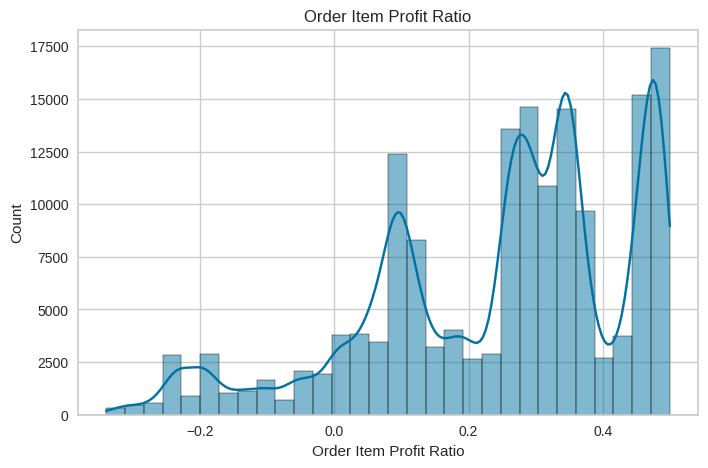

In [40]:
Q1 = df["Order Item Profit Ratio"].quantile(0.25)
Q3 = df["Order Item Profit Ratio"].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Menampilkan outlier
outliers = df[(df["Order Item Profit Ratio"] < batas_bawah) | (df["Order Item Profit Ratio"] > batas_atas)]

#menghapus outlier
df = df[(df["Order Item Profit Ratio"] >= batas_bawah) & (df["Order Item Profit Ratio"] <= batas_atas)]

#menmpilakn visual yang sudah di hapus outliers nya
plt.figure(figsize=(8,5))
sns.histplot(df["Order Item Profit Ratio"], bins=30, kde=True)
plt.title("Order Item Profit Ratio")
plt.show()


Menghapus Outliers di Benefit per order

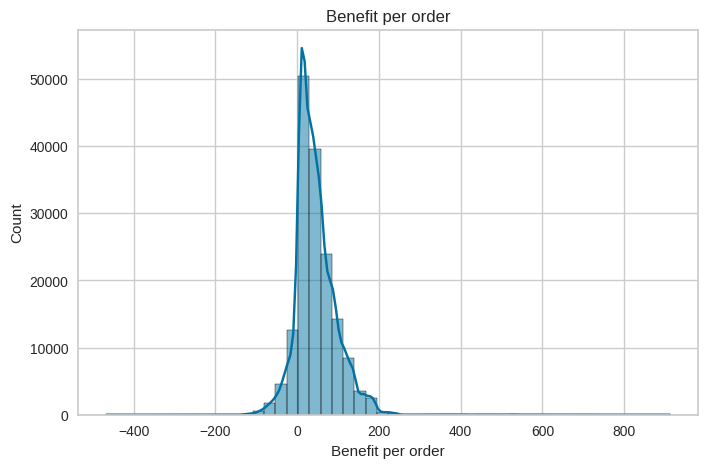

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(df["Benefit per order"], bins=50, kde=True)
plt.title("Benefit per order")
plt.show()

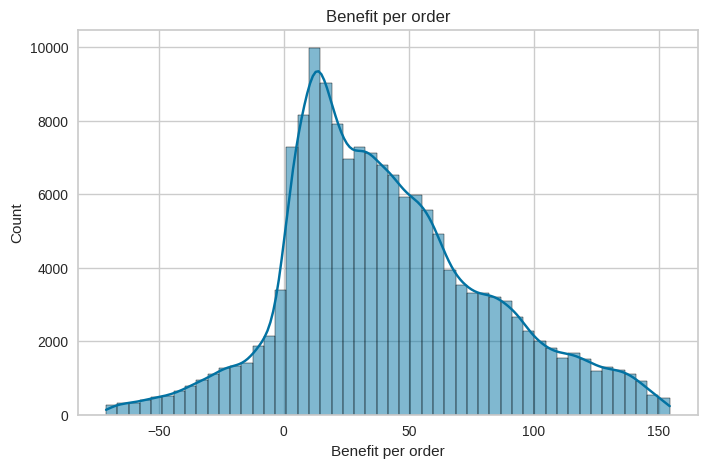

In [42]:
Q1 = df["Benefit per order"].quantile(0.25)
Q3 = df["Benefit per order"].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Menampilkan outlier
outliers = df[(df["Benefit per order"] < batas_bawah) | (df["Benefit per order"] > batas_atas)]
df = df[(df["Benefit per order"] >= batas_bawah) & (df["Benefit per order"] <= batas_atas)]

#show it
plt.figure(figsize=(8,5))
sns.histplot(df["Benefit per order"], bins=50, kde=True)
plt.title("Benefit per order")
plt.show()

Menghapus Outliers di Kolom Sales

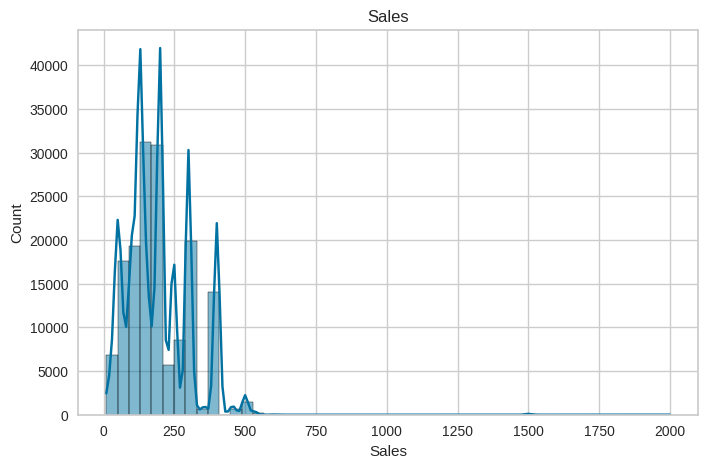

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(df["Sales"], bins=50, kde=True)
plt.title("Sales")
plt.show()

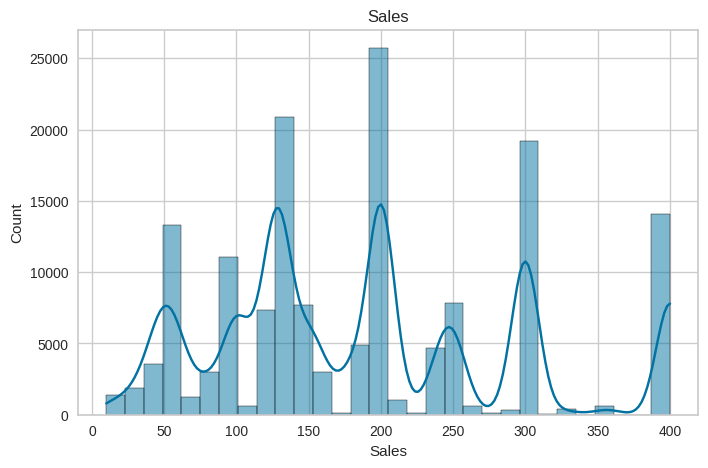

In [44]:
Q1 = df["Sales"].quantile(0.25)
Q3 = df["Sales"].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Menampilkan outlier
outliers = df[(df["Sales"] < batas_bawah) | (df["Sales"] > batas_atas)]
df = df[(df["Sales"] >= batas_bawah) & (df["Sales"] <= batas_atas)]

#show it
plt.figure(figsize=(8,5))
sns.histplot(df["Sales"], bins=30, kde=True)
plt.title("Sales")
plt.show()


Menghapus Outlers di kolom Product Price

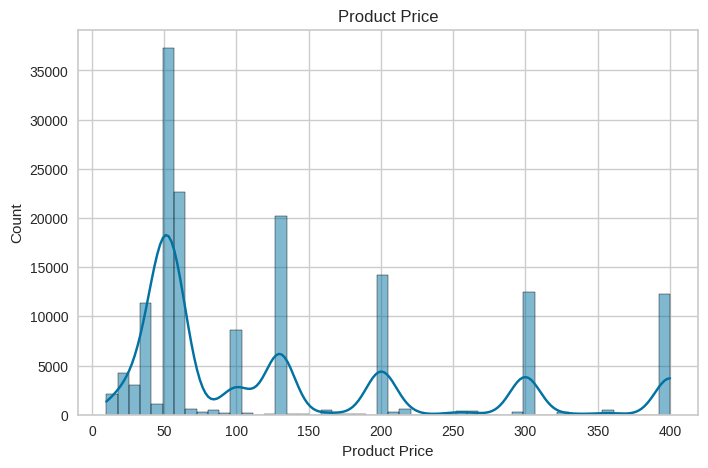

In [45]:
plt.figure(figsize=(8,5))
sns.histplot(df["Product Price"], bins=50, kde=True)
plt.title("Product Price")
plt.show()

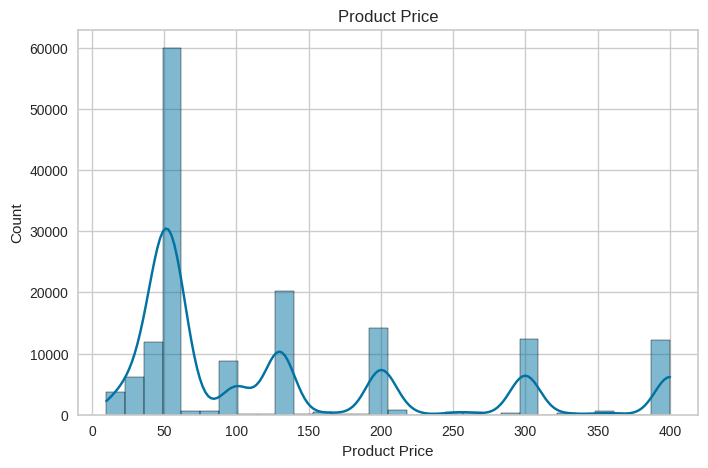

In [46]:
Q1 = df["Product Price"].quantile(0.25)
Q3 = df["Product Price"].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Menampilkan outlier
outliers = df[(df["Product Price"] < batas_bawah) | (df["Product Price"] > batas_atas)]
df = df[(df["Product Price"] >= batas_bawah) & (df["Product Price"] <= batas_atas)]

#show it
plt.figure(figsize=(8,5))
sns.histplot(df["Product Price"], bins=30, kde=True)
plt.title("Product Price")
plt.show()

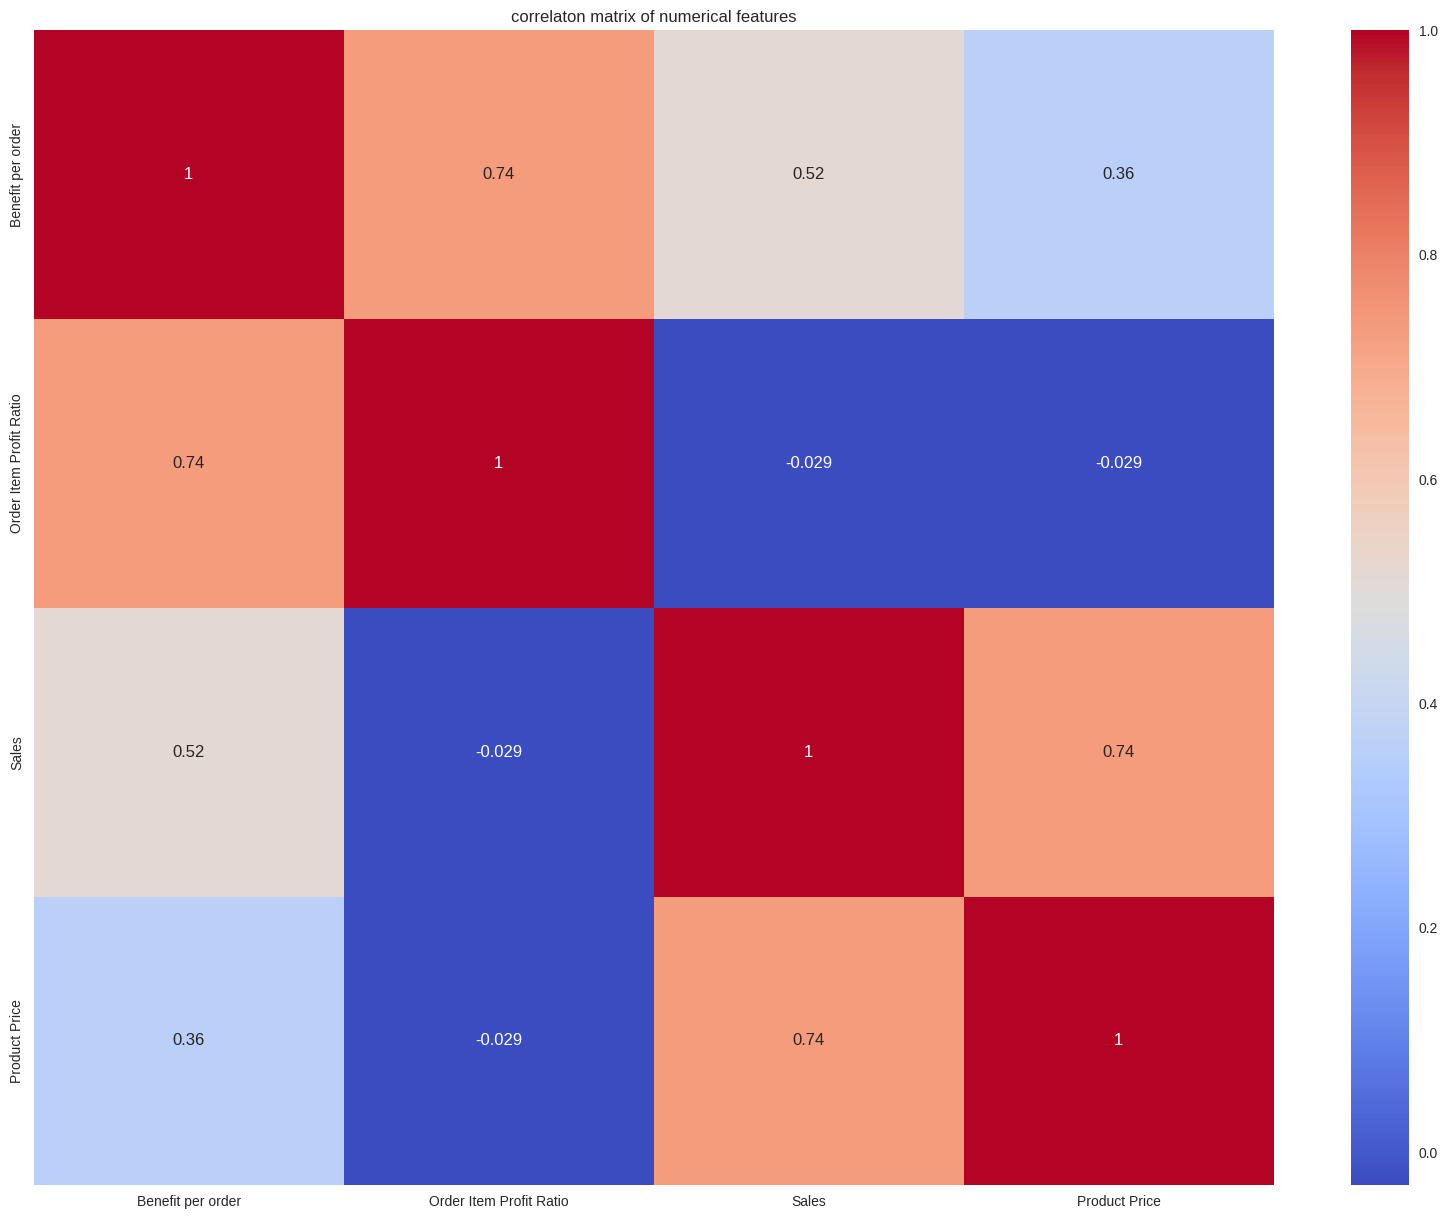


Highly Correlated Features (Absolute Correlation > 0.7):


,Benefit per order,Order Item Profit Ratio,Sales,Product Price
Benefit per order,NaN,0.736771,NaN,NaN
Order Item Profit Ratio,0.736771,NaN,NaN,NaN
Sales,NaN,NaN,NaN,0.736929
Product Price,NaN,NaN,0.736929,NaN


In [47]:
plt.figure(figsize=(20, 15))
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("correlaton matrix of numerical features")
plt.show()

threshold = 0.7
highly_correlated = correlation_matrix[correlation_matrix.abs() > threshold]
highly_correlated = highly_correlated[highly_correlated != 1]
print("\nHighly Correlated Features (Absolute Correlation > {}):".format(threshold))
display(highly_correlated)

gambar matrix correlation menunjukan bahwa ada 2 variable yang angkanya sama.
oleh karena itu, salah satunya dihapus agar tidak mempengaruhi proses pemodelan

In [48]:
df_numerik = df[[col for col in df.columns if df[col].dtype in ['int64', 'float64']]]
df_kategorik = df[[col for col in df.columns if df[col].dtype == 'object']]

In [49]:
# Menghapus fitur yang redundan


corr_matrix = df_numerik.corr().abs()

# Menandai pasangan fitur dengan korelasi tinggi (>0.7)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Menentukan fitur yang akan dihapus
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Menghapus fitur yang redundan
df_reduced = df_numerik.drop(columns=to_drop)

# Menampilkan hasil
print("Fitur yang dihapus:", to_drop)
print("Data setelah penghapusan fitur redundan:\n", df_reduced.head())


Fitur yang dihapus: ['Order Item Profit Ratio', 'Product Price']
Data setelah penghapusan fitur redundan:
    Benefit per order   Sales
0          91.250000  327.75
3          22.860001  327.75
4         134.210007  327.75
5          18.580000  327.75
6          95.180000  327.75


In [50]:
# Cek distribusi tiap kategori
for col in df_kategorik.columns:
    print(f"Distribusi kategori pada {col}:")
    print(df_kategorik[col].value_counts(normalize=True) * 100)
    print("-" * 50)


Distribusi kategori pada Customer Country:
Customer Country
EE. UU.        61.60806
Puerto Rico    38.39194
Name: proportion, dtype: float64
--------------------------------------------------
Distribusi kategori pada Customer Segment:
Customer Segment
Consumer       51.733631
Corporate      30.373611
Home Office    17.892757
Name: proportion, dtype: float64
--------------------------------------------------
Distribusi kategori pada Department Name:
Department Name
Fan Shop              36.757511
Apparel               28.291961
Golf                  19.362386
Footwear               6.669553
Outdoors               5.331119
Fitness                1.435376
Discs Shop             1.174281
Pet Shop               0.282422
Technology             0.255278
Book Shop              0.235244
Health and Beauty      0.204869
Name: proportion, dtype: float64
--------------------------------------------------
Distribusi kategori pada Shipping Mode:
Shipping Mode
Standard Class    59.697026
Second Class 

In [51]:
# Melihat korelasi matriks data kategorik


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Hitung Cramér’s V untuk semua pasangan fitur kategorik
categorical_cols = df_kategorik.columns
cramers_results = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            cramers_results.loc[col1, col2] = cramers_v(df_kategorik[col1], df_kategorik[col2])

print(cramers_results)


                 Customer Country Customer Segment Department Name  \
Customer Country              NaN         0.016811        0.004816   
Customer Segment         0.016811              NaN        0.009969   
Department Name          0.004816         0.009969             NaN   
Shipping Mode            0.009603         0.009332        0.012825   

                 Shipping Mode  
Customer Country      0.009603  
Customer Segment      0.009332  
Department Name       0.012825  
Shipping Mode              NaN  


In [52]:
df_concat = pd.concat([df_reduced, df_kategorik], axis=1)

In [53]:
# Mengecek jumlah kategori unik dalam fitur kategorikal
for col in df_concat.select_dtypes(include=['object']).columns:
    print(f"{col}: {df_concat[col].nunique()} kategori unik")


Customer Country: 2 kategori unik
Customer Segment: 3 kategori unik
Department Name: 11 kategori unik
Shipping Mode: 4 kategori unik


In [54]:
#Mengganti nama varable data yang sudah dibersihkan
df_cleaned = df_concat

In [55]:
df_cleaned.shape

(154733, 6)

In [56]:
#ONE HOT ENCODING
X = pd.get_dummies(df_cleaned, columns=['Customer Country', 'Customer Segment', 'Department Name', 'Shipping Mode'], dummy_na=True)



In [57]:
#Scaling
scaler = MinMaxScaler()
df0_scaled = scaler.fit_transform(X)
X = pd.DataFrame(df0_scaled, columns=X.columns)

X.head()

,Benefit per order,Sales,Customer Country_EE. UU.,Customer Country_Puerto Rico,Customer Country_nan,Customer Segment_Consumer,Customer Segment_Corporate,Customer Segment_Home Office,Customer Segment_nan,Department Name_Apparel,...,Department Name_Health and Beauty,Department Name_Outdoors,Department Name_Pet Shop,Department Name_Technology,Department Name_nan,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class,Shipping Mode_nan
0,0.719810,0.814748,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.416515,0.814748,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.910329,0.814748,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.397534,0.814748,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.737239,0.814748,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#6. Pembangunan Model Clustering


##a. Pembangunan Model Clustering

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [59]:
#Setelah dilakukan looping pencarian cluster yang optimal
#didapatkan bahwa cluster dengan nilai tertinggi adalah 6 clusters
#kode dimatikan, karena datanya besar sehingga memakan banya waktu

"""for k in range(2,10):
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(X)
  score = silhouette_score(X, labels)
  print(f"Silhouette Score untuk {k} clusters: {score}")"""


#output :
# Silhouette Score untuk 2 clusters: 0.5976047258150676
# Silhouette Score untuk 3 clusters: 0.6710200835835397
# Silhouette Score untuk 4 clusters: 0.8921332592214665
# Silhouette Score untuk 5 clusters: 0.937230900932306
# Silhouette Score untuk 6 clusters: 0.9667210059536928
# Silhouette Score untuk 7 clusters: 0.9156557783029107
# Silhouette Score untuk 8 clusters: 0.8387514672659536
# Silhouette Score untuk 9 clusters: 0.7876862396151717



KeyboardInterrupt: 

 model clustering dengan algoritma DBSCAN mengalami crashed karena menggunakan semua RAM

In [60]:


# Tentukan nilai eps secara dinamis dengan mencari jarak tetangga terdekat ke-5
neighbors = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(X)
distances, _ = neighbors.kneighbors(X)
eps_optimal = np.mean(distances[:, -1])  # Ambil rata-rata jarak ke-5 terdekat sebagai eps

# Inisialisasi DBSCAN dengan parameter yang dioptimalkan
dbscan = DBSCAN(eps=eps_optimal, min_samples=5, algorithm='ball_tree')

# Melatih model DBSCAN pada data X
labels = dbscan.fit_predict(X)

# Evaluasi hasil clustering
unique_labels = np.unique(labels)

if len(unique_labels) > 1 and -1 in unique_labels:
    # Hanya menghitung jika ada lebih dari 1 cluster (abaikan outlier -1)
    clustered_labels = labels[labels != -1]
    clustered_X = X[labels != -1]

    if len(np.unique(clustered_labels)) > 1:
        silhouette_avg = silhouette_score(clustered_X, clustered_labels)
        print("Silhouette Score:", silhouette_avg)
    else:
        print("Hanya terdapat satu cluster setelah menghapus outlier, tidak dapat menghitung Silhouette Score")
elif len(unique_labels) > 1:
    silhouette_avg = silhouette_score(X, labels)
    print("Silhouette Score:", silhouette_avg)
else:
    print("Hanya terdapat satu cluster, tidak dapat menghitung Silhouette Score")


Silhouette Score: 0.07287586898863177


Skor yang sangat rendah ini menunjukkan bahwa DBSCAN tidak menemukan cluster yang jelas, atau terlalu banyak data dianggap noise.

Bisa jadi data tidak memiliki pola kepadatan yang cocok untuk DBSCAN.

In [61]:
# Membangun model clustering dengan algoritma KMeans
# Model yang cocok dengan dataset besar

# Menjalankan K-Means dengan 6 cluster
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(X)

# Menghitung Silhouette Score
silhouette = silhouette_score(X, labels)

##b. Evaluasi Model Clustering

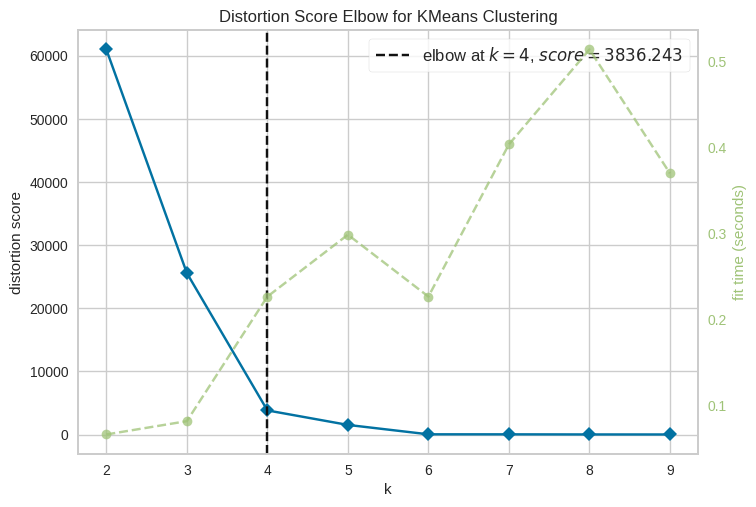


Rekomendasi Jumlah Cluster:
- Berdasarkan Elbow Method: 4 cluster
- Silhouette Score untuk 6 cluster: 0.9667210059536928


In [63]:
#Evaluasi Elbow method
kmeans_elbow =KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans_elbow, k=(2,10))
visualizer.fit(X)
optimal_k_elbow = visualizer.elbow_value_
visualizer.show()

#rekomendasi jumlah cluster
print("\nRekomendasi Jumlah Cluster:")
print(f"- Berdasarkan Elbow Method: {optimal_k_elbow} cluster")
print(f"- Silhouette Score untuk 6 cluster: {silhouette}")

In [65]:
from sklearn.metrics import davies_bouldin_score

dbi_score = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Index: {dbi_score}")


Davies-Bouldin Index: 0.0607976575777531


-DBI yang rendah menunjukkan bahwa cluster memiliki jarak yang jauh satu sama lain (lebih terpisah) dan kompak di dalamnya.

-Dengan DBI 0.0608, model clustering yang digunakan sudah sangat bagus

##c. Feature Selection

In [ ]:
"""from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)  # Hanya menyimpan fitur dengan variansi > 0.1
X_reduced = selector.fit_transform(X)

X_reduced = X"""


##d. Visualisasi Hasil Clustering

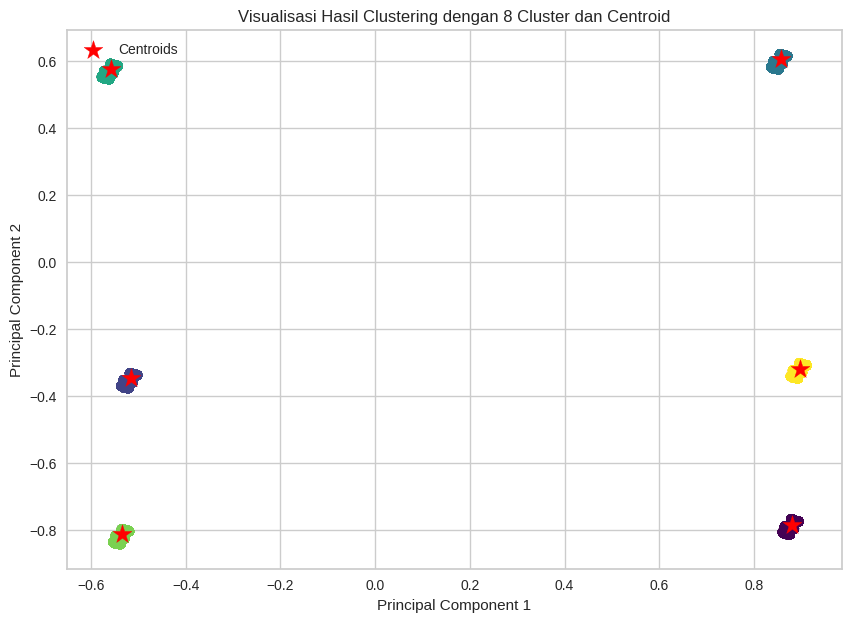

In [66]:
# visualisasi dari hasil clusterin diatas untuk silhouette 8 cluster+ centroids

# Visualisasi hasil clustering dengan scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, c='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualisasi Hasil Clustering dengan 8 Cluster dan Centroid')
plt.legend()
plt.show()



##e. Analisa dan Interpretasi Hasil Cluster

###Inverse Data ika Melakukan Normalisasi/Standarisasi

In [67]:
df_cleaned["Cluster"] = labels
print(df_cleaned.head())

   Benefit per order   Sales Customer Country Customer Segment  \
0          91.250000  327.75      Puerto Rico         Consumer   
3          22.860001  327.75          EE. UU.      Home Office   
4         134.210007  327.75      Puerto Rico        Corporate   
5          18.580000  327.75          EE. UU.         Consumer   
6          95.180000  327.75      Puerto Rico      Home Office   

  Department Name   Shipping Mode  Cluster  
0         Fitness  Standard Class        2  
3         Fitness  Standard Class        1  
4         Fitness  Standard Class        0  
5         Fitness  Standard Class        3  
6         Fitness     First Class        5  


In [68]:
print("Jumlah data dalam setiap cluster:")
print(df_cleaned["Cluster"].value_counts())


Jumlah data dalam setiap cluster:
Cluster
3    49612
2    30437
4    29144
0    17854
1    16572
5    11114
Name: count, dtype: int64


In [69]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154733 entries, 0 to 180516
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Benefit per order  154733 non-null  float64
 1   Sales              154733 non-null  float64
 2   Customer Country   154733 non-null  object 
 3   Customer Segment   154733 non-null  object 
 4   Department Name    154733 non-null  object 
 5   Shipping Mode      154733 non-null  object 
 6   Cluster            154733 non-null  int32  
dtypes: float64(2), int32(1), object(4)
memory usage: 8.9+ MB


###Interpretasi Target

<Figure size 1200x600 with 0 Axes>

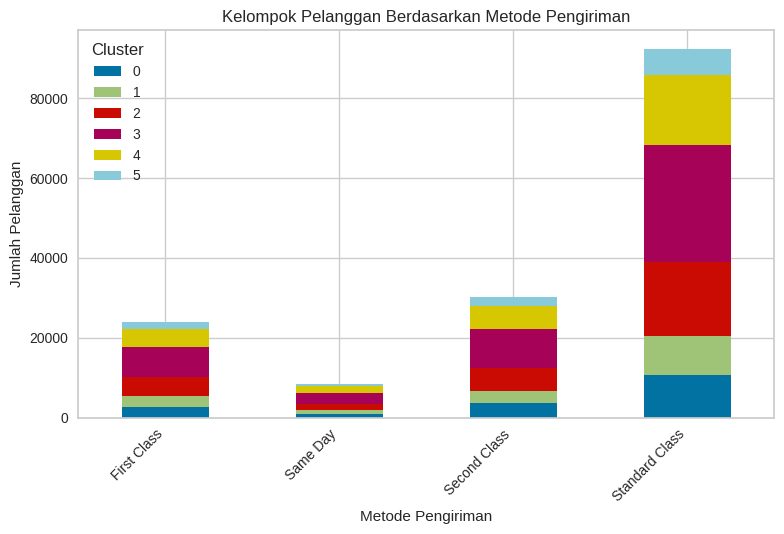


Jumlah Pelanggan per Cluster dan Metode Pengiriman:


Cluster,0,1,2,3,4,5
Shipping Mode,,,,,,
First Class,2759,2658,4753,7624,4281,1737
Same Day,938,848,1605,2794,1651,550
Second Class,3540,3182,5678,9706,5840,2218
Standard Class,10617,9884,18401,29488,17372,6609



Rata-rata Penjualan per Cluster dan Metode Pengiriman:


Cluster,0,1,2,3,4,5
Shipping Mode,,,,,,
First Class,186.569956,184.799447,186.986709,188.977623,189.379698,186.883849
Same Day,187.019609,189.744261,188.990994,185.423837,182.813953,186.043131
Second Class,188.181249,186.690566,187.894014,187.560062,187.295980,187.829318
Standard Class,188.874148,189.393161,187.486567,188.187634,188.233422,187.331247


In [70]:
# Mengidentifikasi kelompok pelanggan berdasarkan metode pengiriman yang mereka gunakan.
# fitur yang diguanakna adalah:
# Customer Country (Negara pelanggan)
# Shipping Mode (Metode pengiriman)
# Sales (Total penjualan)

#mengelompokkan pelanggan berdasarkan metode pengiriman
shipping_mode_groups = df_cleaned.groupby(['Shipping Mode', 'Cluster'])['Customer Country'].count().unstack().fillna(0)

#visualisasi kelompok pelanggan berdasarkan metode pengiriman
plt.figure(figsize=(12, 6))
shipping_mode_groups.plot(kind='bar', stacked=True)
plt.title('Kelompok Pelanggan Berdasarkan Metode Pengiriman')
plt.xlabel('Metode Pengiriman')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

#menampilkan tabel jumlah pelanggan per cluster dan meode pengiriman
print("\nJumlah Pelanggan per Cluster dan Metode Pengiriman:")
display(shipping_mode_groups)

#menghitung rata-rata sales untuk setap kelompok
average_sales_by_shipping_mode = df_cleaned.groupby(['Shipping Mode', 'Cluster'])['Sales'].mean().unstack().fillna(0)
print("\nRata-rata Penjualan per Cluster dan Metode Pengiriman:")
display(average_sales_by_shipping_mode)

Tabel di atas menunjukkan jumlah pelanggan per cluster berdasarkan metode pengiriman serta rata-rata penjualan per cluster berdasarkan metode pengiriman. Berikut adalah analisisnya:

### 1. Jumlah Pelanggan per Cluster dan Metode Pengiriman  
**Temuan Utama:**  
- Cluster 3 memiliki jumlah pelanggan terbanyak di semua metode pengiriman, terutama pada "Standard Class" (29.488 pelanggan).
- Standard Class adalah metode pengiriman yang paling banyak digunakan di semua cluster.
- Same Day adalah metode pengiriman yang paling jarang digunakan di semua cluster.
- Cluster 5 memiliki jumlah pelanggan paling sedikit di semua metode pengiriman—mungkin cluster ini merepresentasikan segmen dengan transaksi lebih sedikit atau jarang berbelanja.

**Interpretasi:**  
- Cluster 3 kemungkinan merupakan pelanggan reguler atau pelanggan besar, karena jumlah pelanggan dan penggunaan layanan pengiriman sangat tinggi.
- Cluster 5 bisa jadi mewakili pelanggan dengan pola belanja yang lebih jarang atau segmen baru yang belum aktif bertransaksi secara rutin.
- Pelanggan lebih cenderung memilih Standard Class dibandingkan opsi pengiriman yang lebih cepat seperti Same Day.

### 2. Rata-rata Penjualan per Cluster dan Metode Pengiriman  
**Temuan Utama:**  
- Rata-rata penjualan cukup stabil di semua cluster dan metode pengiriman, berkisar antara 186 hingga 189.
- Tidak ada perbedaan signifikan dalam pola belanja berdasarkan metode pengiriman.

**Interpretasi:**  
- Keputusan pengiriman tidak terlalu memengaruhi jumlah rata-rata transaksi per pelanggan.
- Semua cluster memiliki kebiasaan belanja yang hampir sama dalam hal rata-rata nilai penjualan per transaksi.
- Meskipun Cluster 3 memiliki pelanggan terbanyak, rata-rata transaksi mereka tetap sebanding dengan cluster lain.

### Kesimpulan dan Rekomendasi  
**Strategi Retensi Pelanggan:**  
- Karena Cluster 3 memiliki jumlah pelanggan terbesar, perusahaan bisa memberikan insentif khusus seperti diskon atau program loyalitas untuk mempertahankan mereka.
- Cluster 5 perlu dianalisis lebih lanjut—apakah pelanggan di cluster ini memang lebih jarang belanja atau ada kendala lain seperti harga, produk, atau layanan.

**Optimalisasi Metode Pengiriman:**  
- Karena Standard Class mendominasi, perusahaan bisa meningkatkan efisiensi biaya dan waktu pengiriman untuk metode ini.
- Same Day memiliki pelanggan paling sedikit—mungkin perlu strategi pemasaran atau promosi untuk meningkatkan penggunaan layanan ini.


**Kesimpulan utama:** Cluster 3 adalah yang paling dominan, Standard Class adalah metode pengiriman utama, dan secara umum rata-rata penjualan tidak berbeda signifikan antar-cluster atau metode pengiriman.



# 7. Mengeksport Data

In [71]:
import pickle

with open("kmeans_model.pkl", "wb") as file:
    pickle.dump(kmeans, file)


In [72]:
df_cleaned.to_csv("hasil_clustering.csv", index=False)
